#### multiplot dashboard
will display renditions of the match and meanshift data sets. These contain a timeseries which is common, or can be blended. 
Should blend: 
    MP | BC
    MP | AC
    MP | MEAN 
    MP | DISTANCE 
    DISTANCE | BC 
    DISTANCE | AC 
    DISTANCE | DURATION 
    MP | MEAN 

<AxesSubplot:xlabel='bidCap', ylabel='distance'>

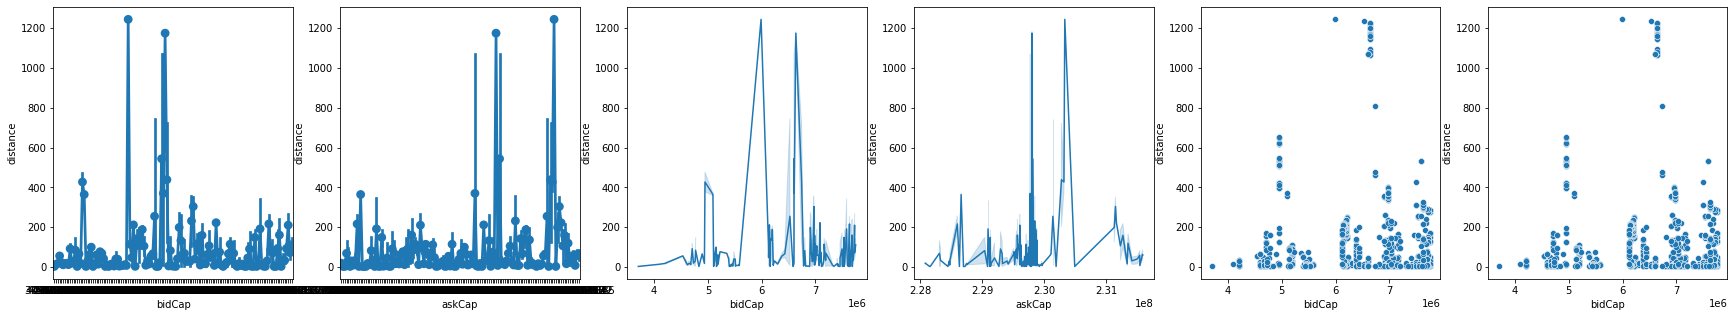

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
mt = pd.read_csv("Thu Jul 28 2022 06_18_25 GMT-0700 (Pacific Daylight Time)-MATCH.csv")
#time,exit,distance,bidCap,askCap,exitTime,entryReachTime,exitReachTime

mn = pd.read_csv("Thu Jul 28 2022 06_18_25 GMT-0700 (Pacific Daylight Time)-MEANSHIFT (1).csv")
#mp,timeStamp,mean,skew
fig, axs = plt.subplots(ncols=6, figsize=(30,5))

sns.pointplot(x="bidCap", y="distance", data=mt, ax=axs[0])
sns.pointplot(x="askCap", y="distance", data=mt, ax=axs[1])
#sns.pointplot(x="mp", y="mean", hue="sex", data=mp, ax=axs[2])
sns.lineplot(x="bidCap", y="distance", data=mt, ax=axs[2])
sns.lineplot(x="askCap", y="distance", data=mt, ax=axs[3])
sns.scatterplot(x="bidCap", y="distance", data=mt, ax=axs[4])
sns.scatterplot(x="bidCap", y="distance", data=mt, ax=axs[5])
    


#### price as a function of surging means: mp | mean
plotting mp as predicted by mean, converting dimensions of interest to arrays, via numpy. per ![https://stackoverflow.com/questions/55654500/seaborn-plot-with-second-y-axis]

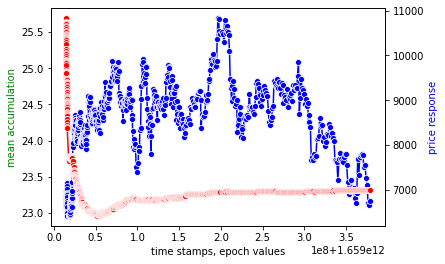

In [23]:
import seaborn as sns # Calls in seaborn

# These lines generate the data to be plotted
y = mn['mp'].to_numpy()#convert to array
x = mn['timeStamp'].to_numpy()
y1 = mn['mean'].to_numpy()

fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

#sns.barplot(x = x, y = y, ax = ax1, color = 'blue') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = x, y = y1, marker = 'o', color = 'red', ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = x, y = y, marker = 'o', color = 'blue', ax = ax1) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('time stamps, epoch values')
ax1.set_ylabel('mean accumulation', color='g')
ax2.set_ylabel('price response', color='b')


plt.show(); # shows the plot. 

#### inverse relationship among bid and ask capitalizations
they move inversely, with negative correlation

In [31]:
from sklearn import linear_model

X = mt[['bidCap']]
Y = mt['askCap']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print(regr.coef_)

[-0.01772803]


<AxesSubplot:xlabel='timeStamp', ylabel='mp'>

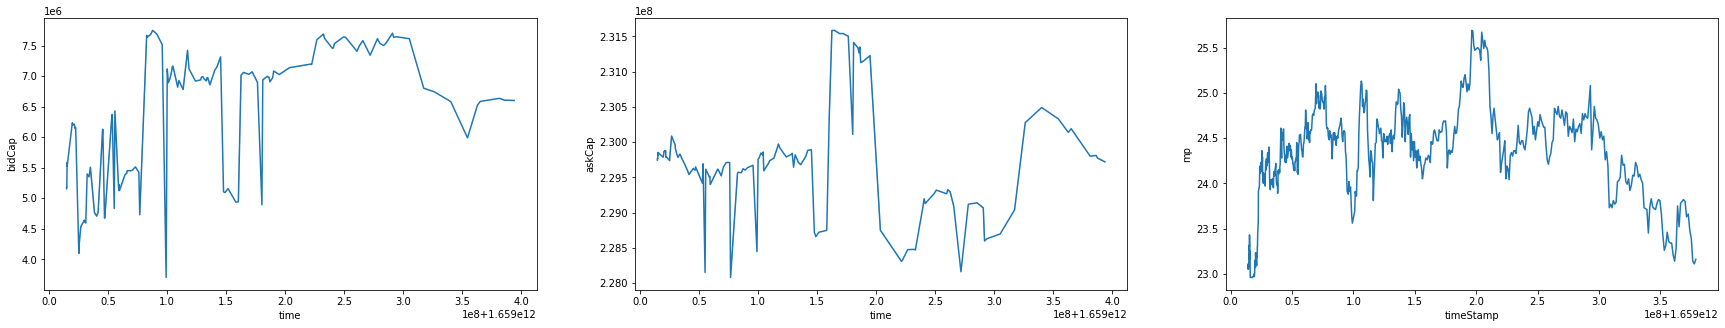

In [35]:
fig, axs = plt.subplots(ncols=3, figsize=(30,5))

sns.lineplot(x="time", y="bidCap", data=mt, ax=axs[0])
sns.lineplot(x="time", y="askCap", data=mt, ax=axs[1])
sns.lineplot(x="timeStamp", y="mp", data=mn, ax=axs[2])


we should have pricing data inside of the matches series, this is being enabled inside the order book analysis. 